In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np


In [24]:
NOAA_20_file = "data/NOAA_20_{year}.csv"
SNPP_file = "data/SNPP_{year}.csv"
NOAA_20_data = []
SNPP_data = []

for year in [2019, 2021, 2022, 2023, 2024]:
    NOAA_20_filename = NOAA_20_file.format(year=year)
    SNPP_filename = SNPP_file.format(year=year)
    # Read the NOAA-20 data and the SNPP data
    firms_data_NOAA_20 = pd.read_csv(NOAA_20_filename)
    firms_data_SNPP = pd.read_csv(SNPP_filename)
    # Append the data to the list
    NOAA_20_data.append(firms_data_NOAA_20)
    SNPP_data.append(firms_data_SNPP)

NOAA_20_data = pd.concat(NOAA_20_data, ignore_index=True)
SNPP_data = pd.concat(SNPP_data, ignore_index=True)

In [25]:
NOAA_20_data.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,47.79976,-53.99381,304.80,0.38,0.36,2019-01-01,539,N20,VIIRS,n,2,263.57,1.38,N,2
1,46.52091,-84.39311,328.11,0.46,0.39,2019-01-01,721,N20,VIIRS,n,2,261.14,4.65,N,0
2,58.57620,-122.58728,312.38,0.39,0.36,2019-01-01,1040,N20,VIIRS,n,2,265.10,1.14,N,0
3,57.02739,-122.92043,327.14,0.40,0.37,2019-01-01,1040,N20,VIIRS,n,2,271.05,5.77,N,0
4,55.45625,-116.73504,295.05,0.40,0.44,2019-01-01,1040,N20,VIIRS,n,2,266.42,0.93,N,0


In [26]:
NOAA_20_data.tail()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
3325252,43.27456,-79.80665,298.30,0.38,0.36,2024-12-31,714,N20,VIIRS,n,2,275.57,0.72,N,3
3325253,43.27311,-79.79729,310.45,0.38,0.36,2024-12-31,714,N20,VIIRS,n,2,274.66,1.71,N,3
3325254,43.27128,-79.80759,295.83,0.38,0.36,2024-12-31,714,N20,VIIRS,n,2,276.14,1.06,N,3
3325255,43.26801,-79.80854,316.26,0.38,0.36,2024-12-31,714,N20,VIIRS,n,2,276.59,1.06,N,3
3325256,53.86443,-101.19816,326.80,0.39,0.36,2024-12-31,852,N20,VIIRS,n,2,262.00,4.91,N,0


In [27]:
SNPP_data.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,50.52198,-104.63961,340.97,0.35,0.56,2019-01-01,811,N,VIIRS,n,2,249.99,3.40,N,2
1,58.02918,-116.75737,322.70,0.43,0.38,2019-01-01,950,N,VIIRS,n,2,266.24,1.36,N,0
2,55.05537,-118.55580,335.59,0.44,0.38,2019-01-01,951,N,VIIRS,n,2,272.81,5.44,N,0
3,55.05296,-118.53534,313.18,0.44,0.38,2019-01-01,951,N,VIIRS,n,2,271.66,1.54,N,0
4,55.05107,-118.55022,318.29,0.44,0.38,2019-01-01,951,N,VIIRS,n,2,272.62,2.34,N,0


In [28]:
print("NOAA 20 Data:")
NOAA_20_data.info()

NOAA 20 Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3325257 entries, 0 to 3325256
Data columns (total 15 columns):
 #   Column      Dtype  
---  ------      -----  
 0   latitude    float64
 1   longitude   float64
 2   brightness  float64
 3   scan        float64
 4   track       float64
 5   acq_date    object 
 6   acq_time    int64  
 7   satellite   object 
 8   instrument  object 
 9   confidence  object 
 10  version     int64  
 11  bright_t31  float64
 12  frp         float64
 13  daynight    object 
 14  type        int64  
dtypes: float64(7), int64(3), object(5)
memory usage: 380.5+ MB


In [29]:
print("SNPP Data:")
SNPP_data.info()

SNPP Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3303773 entries, 0 to 3303772
Data columns (total 15 columns):
 #   Column      Dtype  
---  ------      -----  
 0   latitude    float64
 1   longitude   float64
 2   brightness  float64
 3   scan        float64
 4   track       float64
 5   acq_date    object 
 6   acq_time    int64  
 7   satellite   object 
 8   instrument  object 
 9   confidence  object 
 10  version     int64  
 11  bright_t31  float64
 12  frp         float64
 13  daynight    object 
 14  type        int64  
dtypes: float64(7), int64(3), object(5)
memory usage: 378.1+ MB


In [ ]:
columns_to_remove = ["brightness", "satellite", "instrument", "version", "daynight", "type"]
NOAA_20_data.drop(columns=columns_to_remove, inplace=True)
SNPP_data.drop(columns=columns_to_remove, inplace=True)

In [30]:
print(NOAA_20_data.isnull().sum())
print(SNPP_data.isnull().sum())

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64
latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64


In [31]:
NOAA_20_data.describe()

,latitude,longitude,brightness,scan,track,acq_time,version,bright_t31,frp,type
count,3.325257e+06,3.325257e+06,3.325257e+06,3.325257e+06,3.325257e+06,3.325257e+06,3325257.0,3.325257e+06,3.325257e+06,3.325257e+06
mean,5.757943e+01,-1.119839e+02,3.265485e+02,4.601980e-01,4.756544e-01,1.385250e+03,2.0,2.908740e+02,1.534822e+01,8.660714e-02
std,4.816947e+00,1.472981e+01,2.127309e+01,8.710759e-02,1.140374e-01,5.265270e+02,0.0,1.213863e+01,4.188038e+01,4.815119e-01
min,4.179167e+01,-1.410038e+02,2.079300e+02,3.200000e-01,3.600000e-01,4.170000e+02,2.0,2.257500e+02,0.000000e+00,0.000000e+00
25%,5.380338e+01,-1.210041e+02,3.068600e+02,3.900000e-01,3.800000e-01,9.370000e+02,2.0,2.839200e+02,1.840000e+00,0.000000e+00
50%,5.827735e+01,-1.160703e+02,3.280200e+02,4.400000e-01,4.400000e-01,1.101000e+03,2.0,2.891900e+02,4.170000e+00,0.000000e+00
75%,6.057592e+01,-1.064319e+02,3.429500e+02,5.100000e-01,5.500000e-01,1.948000e+03,2.0,2.969100e+02,1.112000e+01,0.000000e+00
max,8.121883e+01,-5.266324e+01,3.670000e+02,8.000000e-01,7.800000e-01,2.346000e+03,2.0,3.811700e+02,2.827690e+03,3.000000e+00


In [32]:
SNPP_data.describe()

,latitude,longitude,brightness,scan,track,acq_time,version,bright_t31,frp,type
count,3.303773e+06,3.303773e+06,3.303773e+06,3.303773e+06,3.303773e+06,3.303773e+06,3303773.0,3.303773e+06,3.303773e+06,3.303773e+06
mean,5.755415e+01,-1.119821e+02,3.271474e+02,4.598148e-01,4.743285e-01,1.397188e+03,2.0,2.909532e+02,1.508601e+01,8.378633e-02
std,4.793454e+00,1.478546e+01,2.170135e+01,8.703119e-02,1.158817e-01,5.276608e+02,0.0,1.222997e+01,3.928800e+01,4.733085e-01
min,4.175556e+01,-1.410039e+02,2.080000e+02,3.200000e-01,3.600000e-01,4.230000e+02,2.0,1.500000e+02,-1.900000e+00,0.000000e+00
25%,5.372479e+01,-1.210380e+02,3.070300e+02,3.900000e-01,3.700000e-01,9.400000e+02,2.0,2.839300e+02,1.850000e+00,0.000000e+00
50%,5.825739e+01,-1.161627e+02,3.285700e+02,4.400000e-01,4.300000e-01,1.105000e+03,2.0,2.892300e+02,4.250000e+00,0.000000e+00
75%,6.051714e+01,-1.063722e+02,3.437800e+02,5.100000e-01,5.500000e-01,1.954000e+03,2.0,2.970300e+02,1.143000e+01,0.000000e+00
max,8.256747e+01,-5.266550e+01,3.670000e+02,8.000000e-01,7.800000e-01,2.346000e+03,2.0,3.893800e+02,4.191100e+03,3.000000e+00


In [33]:
## Filtering out points with low confidence
rows = (NOAA_20_data.shape[0], SNPP_data.shape[0])

#Cleaning the data
NOAA_20_data = NOAA_20_data[NOAA_20_data['confidence'].isin(['n', 'h'])]
SNPP_data = SNPP_data[SNPP_data['confidence'].isin(['n', 'h'])]
NOAA_20_data = NOAA_20_data[NOAA_20_data['frp'] != 0]
SNPP_data = SNPP_data[SNPP_data['frp'] != 0]

rows_after = (NOAA_20_data.shape[0], SNPP_data.shape[0])
print(f"Rows before filtering: {rows}")
print(f"Rows after filtering: {rows_after}")
print("NOAA Rows removed: ", rows[0] - rows_after[0])
print("SNPP Rows removed: ", rows[1] - rows_after[1])

Rows before filtering: (3325257, 3303773)
Rows after filtering: (3188531, 3169368)
NOAA Rows removed:  136726
SNPP Rows removed:  134405


In [ ]:
# Convert acquisition date to datetime format
NOAA_20_data['acq_date'] = pd.to_datetime(NOAA_20_data['acq_date'])

# Step 2: Load the Canada provinces shapefile
# Note: Adjust the path and layer details based on your file.
provinces = gpd.read_file("data/province_Data/gpr_000b11a_e.shp")

# Inspect the provinces GeoDataFrame to see which column contains the province name.
print(provinces.columns)

# Step 3: Convert FIRMS data to a GeoDataFrame using the latitude and longitude columns
fire_gdf = gpd.GeoDataFrame(
    NOAA_20_data, 
    geometry=gpd.points_from_xy(NOAA_20_data.longitude, NOAA_20_data.latitude),
    crs="EPSG:4326"
)

# Step 4: Spatially join the fire points with the province boundaries
# This attaches the province information to each fire record based on location.
fire_with_province = gpd.sjoin(fire_gdf, provinces, how="left", predicate="intersects")

fire_with_province

Index(['PRUID', 'PRNAME', 'PRENAME', 'PRFNAME', 'PREABBR', 'PRFABBR',
       'geometry'],
      dtype='object')


/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_44408/292724961.py:20: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4269

  fire_with_province = gpd.sjoin(fire_gdf, provinces, how="left", predicate="intersects")


In [ ]:
fire_with_province["YEAR"] = fire_with_province["acq_date"].dt.year
fire_with_province["YEAR"]

0         2019
1         2019
2         2019
3         2019
4         2019
          ... 
967502    2019
967504    2019
967506    2019
967507    2019
967508    2019
Name: YEAR, Length: 932360, dtype: int32

In [ ]:
fire_with_province.groupby('PRNAME').size().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(10, 6))

In [ ]:
fire_with_province.groupby('PRNAME').sum('frp').sort_values(by='frp', ascending=False).head(10)

Top three provinces with most wildfires:
PRNAME
Alberta    417435
Yukon      150585
Ontario    133210
Name: count, dtype: int64
Top four months with most wildfires:
month
July         364080
May          249145
June         123665
September     53325
Name: count, dtype: int64


/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_44408/1753615807.py:21: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(provinces.geometry.centroid.x, provinces.geometry.centroid.y, provinces['PRNAME']):


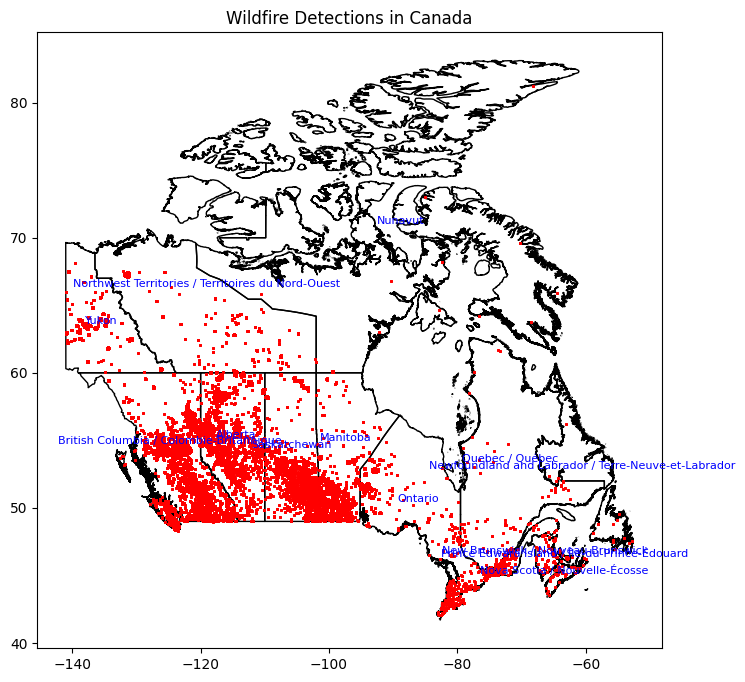

In [ ]:
# Step 5: Group by province to get counts of fire detections per province
# Adjust 'NAME' to the appropriate column name in your provinces shapefile if different.
top_provinces = fire_with_province['PRNAME'].value_counts().head(3)
print("Top three provinces with most wildfires:")
print(top_provinces)

# Step 6: Extract the month name from the acquisition date for temporal analysis
NOAA_20_data['month'] = NOAA_20_data['acq_date'].dt.month_name()

# Count the number of fire events per month and get the top four months
top_months = NOAA_20_data['month'].value_counts().head(4)
print("Top four months with most wildfires:")
print(top_months)

# Optional: Plotting the fire locations for a visual check (e.g., using a simple plot)
fig, ax = plt.subplots(figsize=(10, 8))
provinces.plot(ax=ax, color='none', edgecolor='black')
fire_gdf.plot(ax=ax, markersize=1, color='red')

# Add province names to the plot
for x, y, label in zip(provinces.geometry.centroid.x, provinces.geometry.centroid.y, provinces['PRNAME']):
    ax.text(x, y, label, fontsize=8, ha='center', color='blue')

plt.title("Wildfire Detections in Canada")
plt.show()